# SPEECH EMOTION RECOGNITION

# 1.DATA PREPARATION

IMPORT ALL LIBRARIES

In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
#loading data with diff key words
TESS = "C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//"
RAV = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/"
SAVEE ="C:/Users/mailt/Desktop/review/ALL/"
CREMA = "C:/Users/mailt/Desktop/review/AudioWAV/"

# Running one example 
dir_list = os.listdir(SAVEE)
dir_list[:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

SAVEE DATASET

In [3]:
# Getting the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

#  checking out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_disgust      60
male_fear         60
male_angry        60
male_happy        60
male_surprise     60
male_sad          60
Name: labels, dtype: int64

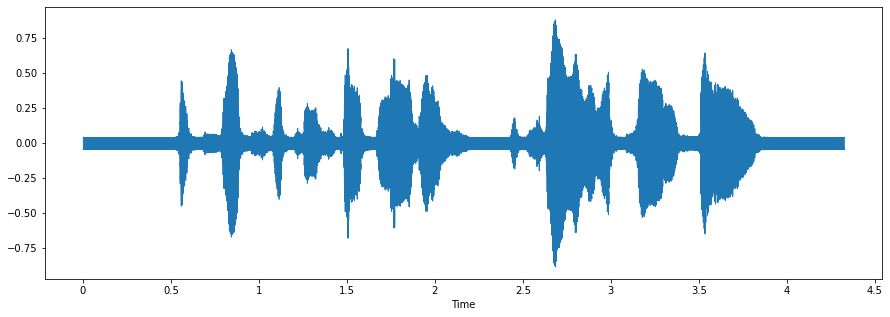

In [4]:
# use Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


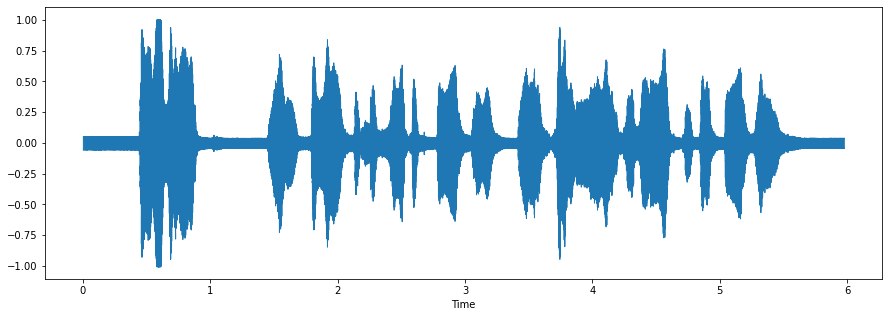

In [5]:
#  play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

#  play the audio 
ipd.Audio(fname)


RAVDESS DATASET

In [9]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_sad          96
female_surprise     96
female_angry        96
male_angry          96
female_disgust      96
male_happy          96
male_disgust        96
male_fear           96
male_sad            96
female_fear         96
male_surprise       96
female_happy        96
Name: labels, dtype: int64

# 2.EXPLORE DATASET

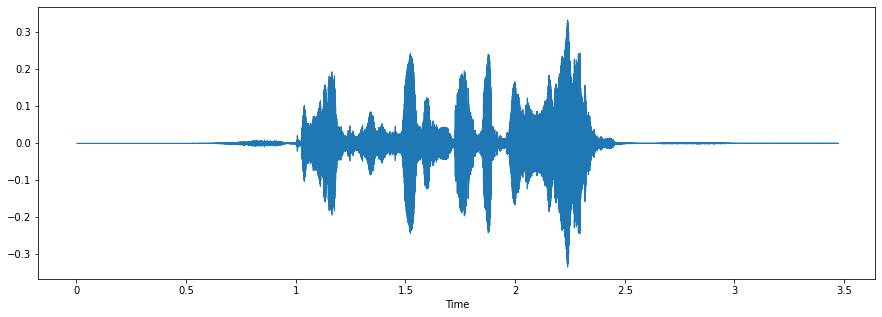

In [10]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

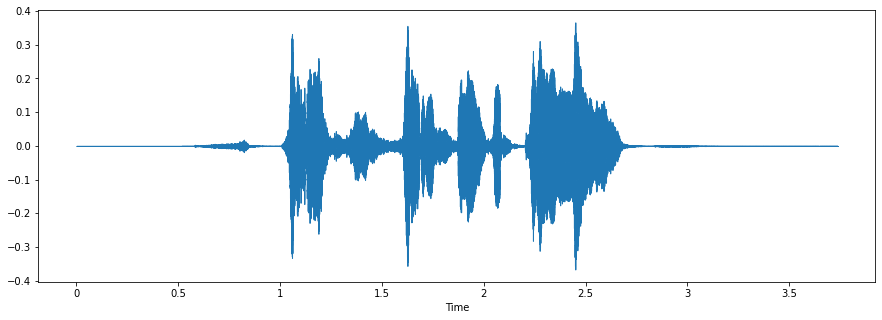

In [11]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

TESS DATASET

In [12]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [13]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_disgust     400
female_fear        400
female_surprise    400
female_angry       400
female_sad         400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

In [14]:
path[:5]


['C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//OAF_Fear/OAF_back_fear.wav',
 'C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//OAF_Fear/OAF_bar_fear.wav',
 'C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//OAF_Fear/OAF_base_fear.wav',
 'C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//OAF_Fear/OAF_bath_fear.wav',
 'C:/Users/mailt/Desktop/review/TESS Toronto emotional speech set data//OAF_Fear/OAF_bean_fear.wav']

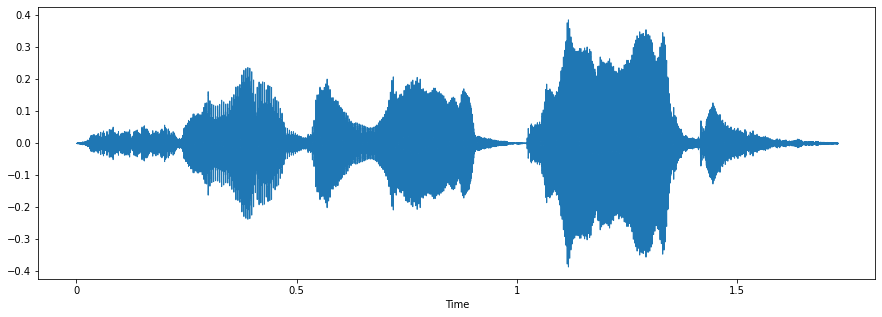

In [15]:
#play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

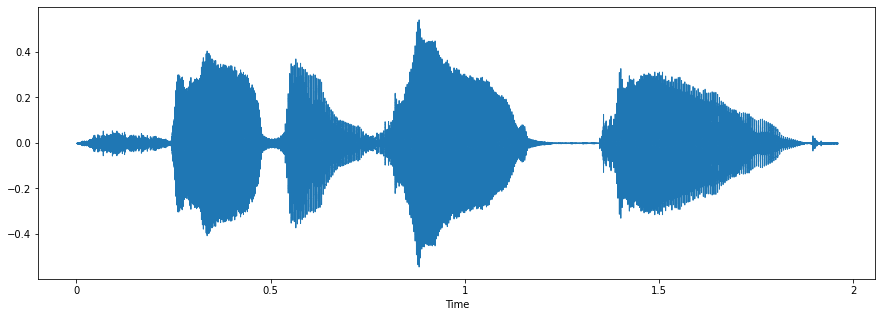

In [16]:
# play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

CREMA DATASET

In [17]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [18]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_happy        671
male_disgust      671
male_fear         671
male_sad          671
female_fear       600
female_angry      600
female_sad        600
female_disgust    600
female_happy      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

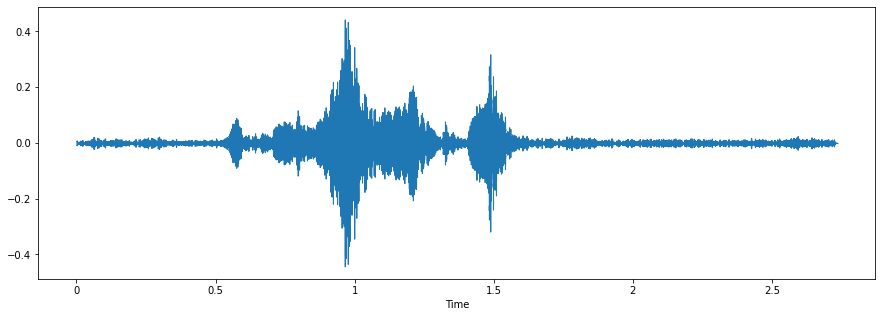

In [19]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


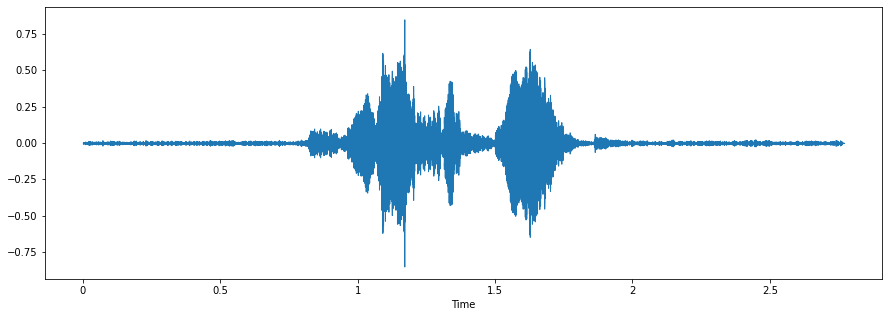

In [20]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

SAVING ALL THE DATASETS IN A SINGLE FILE

In [21]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_fear        1096
female_happy       1096
female_angry       1096
female_sad         1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_fear           827
male_sad            827
male_happy          827
male_disgust        827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


# 3.FEATURE EXTRACTION

In [22]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

SAMPLE MFCC OUTPUT

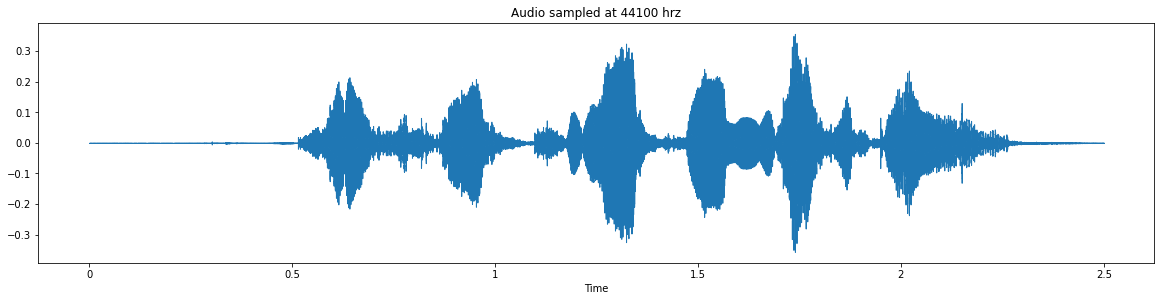

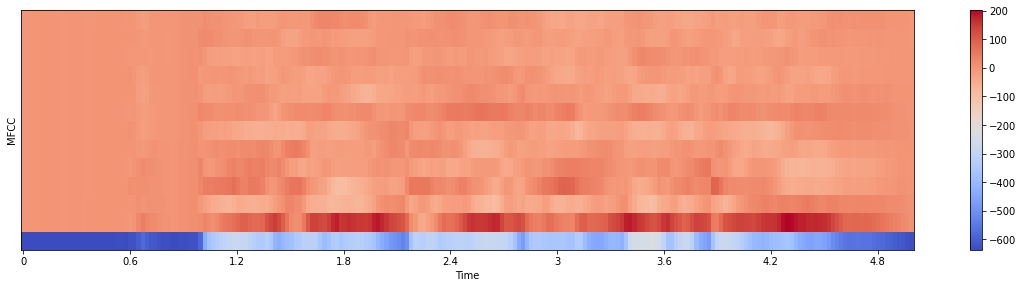

In [7]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path =  "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


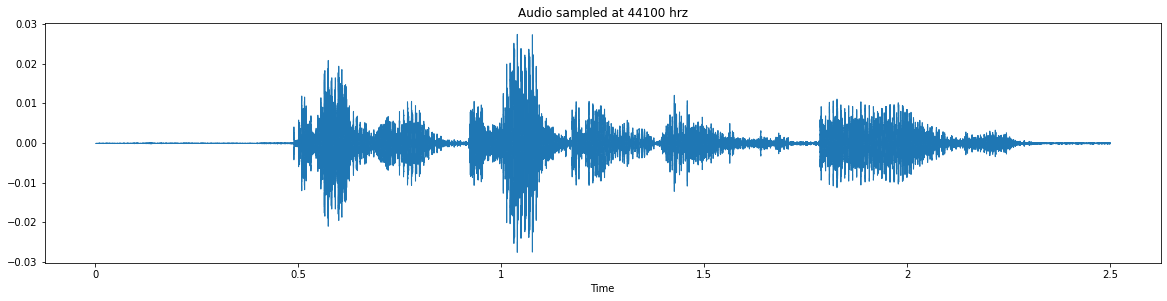

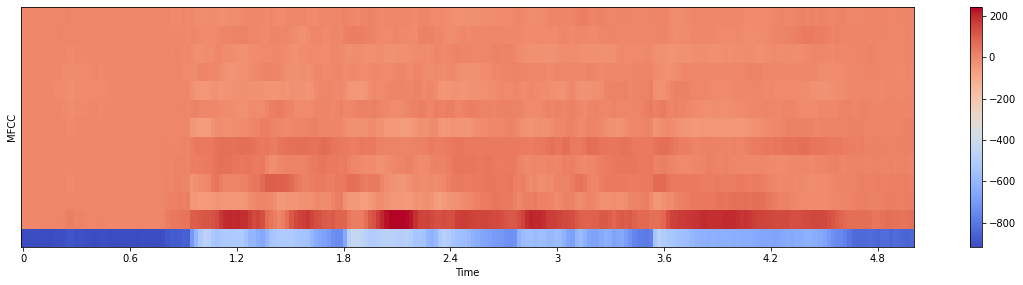

In [8]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

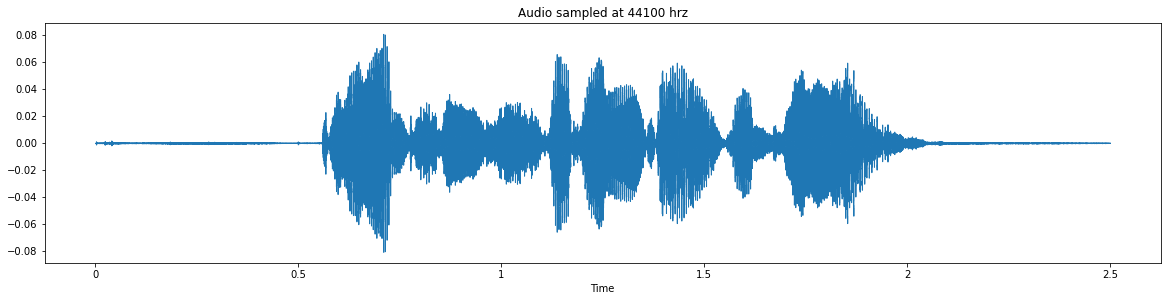

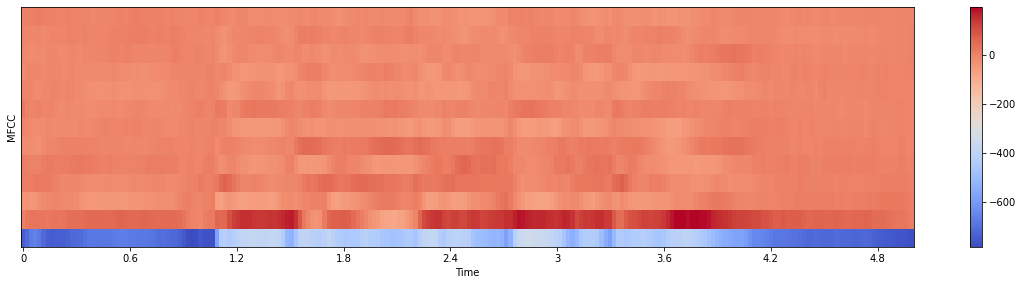

In [9]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

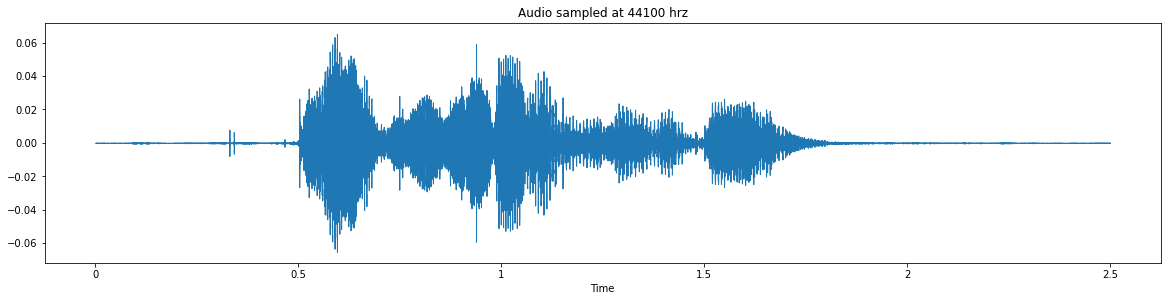

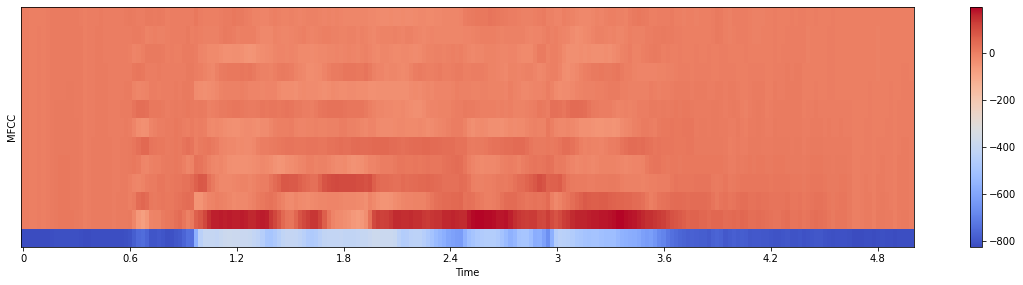

In [10]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

TAKING MEAN ACCROSS BANDS

216
216


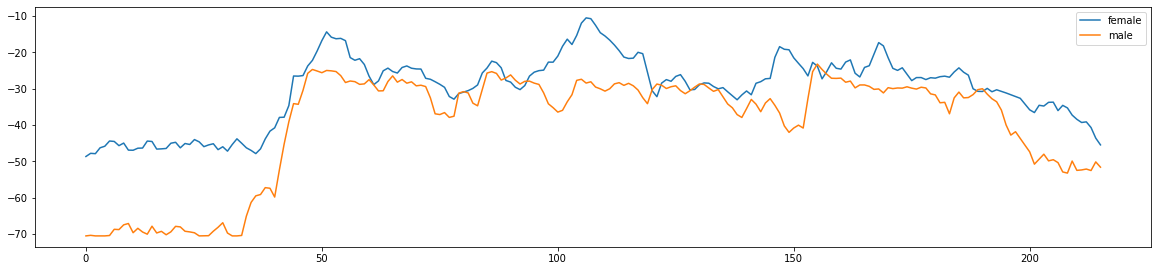

In [11]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


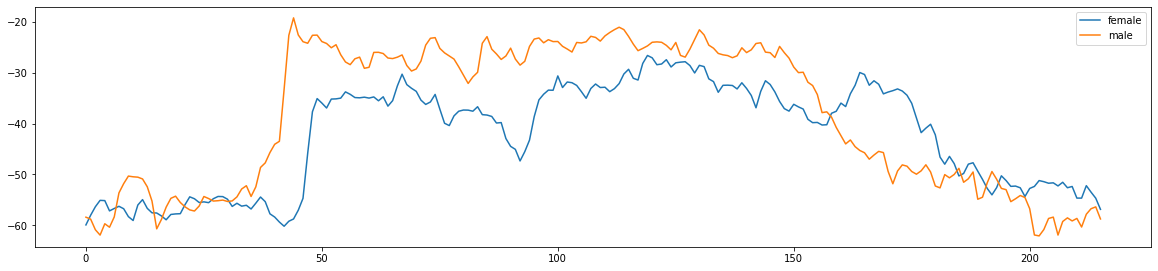

In [12]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "C:/Users/mailt/Desktop/review/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

# BASELINE MODEL

In [13]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

DATA PREPARATION

In [14]:
# Loading the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("C:/Users/mailt/Desktop/review/Data_path.csv")
ref.head()

labels source                                          path
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav

In [15]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Checking a few records to make sure its processed successfully
print(len(df))
df.head()

12162


feature
0  [-4.6414213, -3.860898, -6.21919, -5.9265423, ...
1  [-8.690716, -12.522837, -22.928043, -23.243807...
2  [-8.814859, -12.819055, -24.178183, -23.84745,...
3  [-2.2684252, -4.317077, -12.285238, -13.083024...
4  [-13.485307, -16.26042, -25.884357, -27.827044...

DATA PROCESSING

In [16]:
# Extracting the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                          path          0  \
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav  -4.641421   
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav  -8.690716   
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav  -8.814859   
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav  -2.268425   
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav -13.485307   

           1          2          3          4          5          6  ...  \
0  -3.860898  -6.219190  -5.926542  -5.850419  -4.808960  -2.513003  ...   
1 -12.522837 -22.928043 -23.243807 -22.926605 -23.432241 -14.830004  ...   
2 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485  -8.681472  ...   
3  -4.317077 -12.285238 -13.083024 -12.041327 -11.819768  -9.414148  ...   
4 -16.260420 -25.884357 -27.827044 -27.593534 -26.666508 -18.659023  ...   

         206        207        208        209        210        211  \
0  -4.088852  -5.023864  -5.254714  -5.234095  -5.310307  -5.621666   
1 -22.627258 -22.633406 -22.511597 -24.300154 -24.496809 -22.895985   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4 -25.291666 -25.854906 -26.821354 -25.436455 -24.179941 -23.281618   

         212        213        214        215  
0  -6.072197  -6.611348  -3.999875   1.390506  
1 -23.511503 -24.342152 -16.465857  -8.936035  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [17]:
# replacing NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


labels source                                          path          0  \
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav  -4.641421   
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav  -8.690716   
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav  -8.814859   
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav  -2.268425   
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav -13.485307   

           1          2          3          4          5          6  ...  \
0  -3.860898  -6.219190  -5.926542  -5.850419  -4.808960  -2.513003  ...   
1 -12.522837 -22.928043 -23.243807 -22.926605 -23.432241 -14.830004  ...   
2 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485  -8.681472  ...   
3  -4.317077 -12.285238 -13.083024 -12.041327 -11.819768  -9.414148  ...   
4 -16.260420 -25.884357 -27.827044 -27.593534 -26.666508 -18.659023  ...   

         206        207        208        209        210        211  \
0  -4.088852  -5.023864  -5.254714  -5.234095  -5.310307  -5.621666   
1 -22.627258 -22.633406 -22.511597 -24.300154 -24.496809 -22.895985   
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -25.291666 -25.854906 -26.821354 -25.436455 -24.179941 -23.281618   

         212        213        214        215  
0  -6.072197  -6.611348  -3.999875   1.390506  
1 -23.511503 -24.342152 -16.465857  -8.936035  
2   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000  
4 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [18]:
# Spliting between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Data  before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
4950  -17.178812 -17.293514 -18.411484 -18.987421 -17.404621 -16.747272   
3860  -13.317886 -16.820253 -23.087044 -22.467028 -20.362326 -19.076139   
9761   -4.828484  -6.076792  -9.614023 -12.045173  -9.992991 -11.926252   
7620   -7.050759  -4.283339  -4.567833  -5.871509  -5.282474  -6.490458   
11586 -22.590061 -21.799614 -20.563650 -20.703461 -21.205717 -18.608530   
7914  -20.099588 -19.013206 -17.043013 -16.977905 -19.369631 -19.562126   
9513  -20.122585 -18.657488 -16.149492 -16.963453 -18.229979 -18.183958   
5835  -21.096134 -18.702654 -17.710285 -18.043194 -18.252481 -18.710627   
5389  -22.736338 -20.195595 -18.961348 -19.468687 -19.316292 -18.162565   
11222 -20.042538 -17.674582 -19.222475 -18.469973 -17.572329 -17.850542   

             6          7          8          9    ...        206        207  \
4950  -17.733749 -18.055027 -17.931210 -15.913172  ... -22.899403 -21.647814   
3860  -19.761509 -13.231027 -11.808992 -16.756002  ...   0.000000   0.000000   
9761  -14.008465 -13.561556 -14.024567 -15.151947  ...   0.000000   0.000000   
7620   -8.156467  -9.188803  -8.681726  -8.212410  ...   0.000000   0.000000   
11586 -18.446669 -16.211843 -14.257653 -15.160404  ...   0.000000   0.000000   
7914  -22.008749 -20.178383 -17.989597 -19.336285  ...   0.000000   0.000000   
9513  -19.274342 -18.395124 -16.951286 -16.672031  ... -17.882132 -19.390713   
5835  -16.626354 -17.831005 -18.028345 -17.859106  ...   0.000000   0.000000   
5389  -18.102335 -19.914131 -20.931385 -19.215496  ...   0.000000   0.000000   
11222 -17.932026 -20.588900 -18.612185 -15.990725  ... -18.065437 -18.135092   

             208        209        210        211        212        213  \
4950  -19.758650 -18.879402 -19.397377 -20.171659 -22.689240 -24.612816   
3860    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9761    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7620    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11586   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7914    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
9513  -17.779472 -19.165937   0.000000   0.000000   0.000000   0.000000   
5835    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5389    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
11222 -19.665306 -20.741903 -20.273037 -18.371035 -15.576725 -17.512487   

             214        215  
4950  -24.073122 -23.239702  
3860    0.000000   0.000000  
9761    0.000000   0.000000  
7620    0.000000   0.000000  
11586   0.000000   0.000000  
7914    0.000000   0.000000  
9513    0.000000   0.000000  
5835    0.000000   0.000000  
5389    0.000000   0.000000  
11222 -17.050734 -19.143282  

[10 rows x 216 columns]

In [19]:
# Doing data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# The dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
4950   0.371092  0.349779  0.437225  0.387953  0.499050  0.543698  0.462640   
3860   0.649367  0.384727  0.090003  0.130081  0.280174  0.371310  0.312801   
9761   1.261238  1.178079  1.090555  0.902442  1.047526  0.900562  0.737915   
7620   1.101068  1.310517  1.465302  1.359971  1.396114  1.302933  1.170341   
11586 -0.018923  0.017025  0.277398  0.260778  0.217761  0.405923  0.409959   
7914   0.160577  0.222788  0.538853  0.536878  0.353635  0.335336  0.146744   
9513   0.158920  0.249056  0.605209  0.537949  0.437972  0.437351  0.348800   
5835   0.088752  0.245720  0.489299  0.457930  0.436306  0.398366  0.544469   
5389  -0.029466  0.135474  0.396391  0.352287  0.357582  0.438935  0.435403   
11222  0.164689  0.321639  0.376999  0.426301  0.486639  0.462031  0.447988   

            7         8         9    ...       206       207       208  \
4950   0.433207  0.435874  0.580961  ... -0.883238 -0.815446 -0.695031   
3860   0.789026  0.886970  0.518881  ...  0.540185  0.526218  0.525755   
9761   0.764646  0.723723  0.637030  ...  0.540185  0.526218  0.525755   
7620   1.087182  1.117393  1.148174  ...  0.540185  0.526218  0.525755   
11586  0.569161  0.706548  0.636408  ...  0.540185  0.526218  0.525755   
7914   0.276587  0.431572  0.328826  ...  0.540185  0.526218  0.525755   
9513   0.408121  0.508077  0.525066  ... -0.571365 -0.675557 -0.572748   
5835   0.449731  0.428717  0.437630  ...  0.540185  0.526218  0.525755   
5389   0.296079  0.214816  0.337723  ...  0.540185  0.526218  0.525755   
11222  0.246308  0.385699  0.575249  ... -0.582759 -0.597738 -0.689264   

            209       210       211       212       213       214       215  
4950  -0.633081 -0.679814 -0.722825 -0.865524 -0.989207 -0.975158 -0.920808  
3860   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
9761   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
7620   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
11586  0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
7914   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
9513  -0.650682  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
5835   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
5389   0.526664  0.511820  0.512074  0.512938  0.501388  0.494903  0.488294  
11222 -0.747492 -0.733608 -0.612591 -0.433410 -0.559199 -0.546326 -0.672428  

[10 rows x 216 columns]

In [20]:
from keras.utils.np_utils import to_categorical
# Preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickeling the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()


(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [21]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

DATA MODELLING

In [22]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          2304      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 216, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 216, 256)          0         
                                                                 
 dropout (Dropout)           (None, 216, 256)          0         
                                                        

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 [==============================] - 106s 182ms/step - loss: 2.3719 - accuracy: 0.2084 - val_loss: 2.4365 - val_accuracy: 0.2032
Epoch 2/100
571/571 [==============================] - 102s 178ms/step - loss: 2.1681 - accuracy: 0.2667 - val_loss: 2.2143 - val_accuracy: 0.2723
Epoch 3/100
571/571 [==============================] - 102s 178ms/step - loss: 2.0676 - accuracy: 0.2959 - val_loss: 2.1313 - val_accuracy: 0.3091
Epoch 4/100
571/571 [==============================] - 85s 149ms/step - loss: 1.9912 - accuracy: 0.3181 - val_loss: 2.0807 - val_accuracy: 0.3226
Epoch 5/100
571/571 [==============================] - 78s 137ms/step - loss: 1.9451 - accuracy: 0.3300 - val_loss: 2.0410 - val_accuracy: 0.3456
Epoch 6/100
571/571 [==============================] - 74s 130ms/step - loss: 1.8978 - accuracy: 0.3513 - val_loss: 1.9889 - val_accuracy: 0.3555
Epoch 7/100
571/571 [==============================] - 76s 133ms/step - loss: 1.8581 - accuracy: 0.3652 - val_loss: 1.964

Epoch 57/100
571/571 [==============================] - 72s 126ms/step - loss: 1.2523 - accuracy: 0.5722 - val_loss: 1.6069 - val_accuracy: 0.4443
Epoch 58/100
571/571 [==============================] - 71s 125ms/step - loss: 1.2352 - accuracy: 0.5792 - val_loss: 1.6219 - val_accuracy: 0.4429
Epoch 59/100
571/571 [==============================] - 71s 125ms/step - loss: 1.2332 - accuracy: 0.5793 - val_loss: 1.6271 - val_accuracy: 0.4314
Epoch 60/100
571/571 [==============================] - 71s 124ms/step - loss: 1.2229 - accuracy: 0.5839 - val_loss: 1.6188 - val_accuracy: 0.4281
Epoch 61/100
571/571 [==============================] - 71s 125ms/step - loss: 1.2132 - accuracy: 0.5895 - val_loss: 1.6185 - val_accuracy: 0.4258
Epoch 62/100
571/571 [==============================] - 71s 125ms/step - loss: 1.2042 - accuracy: 0.5871 - val_loss: 1.6951 - val_accuracy: 0.4140
Epoch 63/100
571/571 [==============================] - 74s 130ms/step - loss: 1.1996 - accuracy: 0.5903 - val_loss: 1

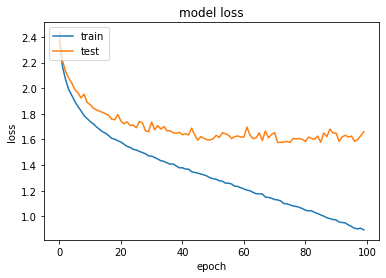

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model serialisation

In [25]:
# Saving model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Saving the model to device
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\mailt\Desktop\review\saved_models\Emotion_Model.h5 


Model validation

In [26]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 42.35%


In [27]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 6s 23ms/step


array([11,  3,  0, ...,  2,  5,  0], dtype=int64)

In [28]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170        male_sad        male_sad
171  female_neutral  female_neutral
172      male_angry    female_angry
173  female_disgust  female_disgust
174      male_angry      male_angry
175     female_fear    female_angry
176    male_neutral    male_neutral
177     female_fear    female_happy
178    female_happy    female_angry
179  female_neutral  female_neutral

In [29]:
# Writing out the predictions to device
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              759
female_disgust            408
female_fear               263
female_happy              306
female_neutral            285
female_sad                256
female_surprise           113
male_angry                123
male_disgust               81
male_fear                 106
male_happy                 83
male_neutral              156
male_sad                   91
male_surprise              11

In [30]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'


0.42354488655047684


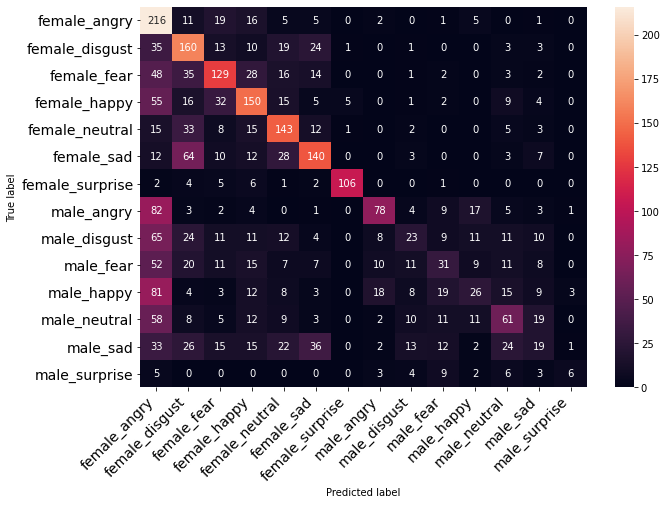

In [31]:
# Geting the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [32]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.28      0.77      0.42       281
 female_disgust       0.39      0.59      0.47       269
    female_fear       0.49      0.46      0.48       278
   female_happy       0.49      0.51      0.50       294
 female_neutral       0.50      0.60      0.55       237
     female_sad       0.55      0.50      0.52       279
female_surprise       0.94      0.83      0.88       127
     male_angry       0.63      0.37      0.47       209
   male_disgust       0.28      0.12      0.16       199
      male_fear       0.29      0.16      0.21       192
     male_happy       0.31      0.12      0.18       209
   male_neutral       0.39      0.29      0.33       209
       male_sad       0.21      0.09      0.12       220
  male_surprise       0.55      0.16      0.24        38

       accuracy                           0.42      3041
      macro avg       0.45      0.40      0.40      3041
   weighted avg       0.43   

0.7523840841828346


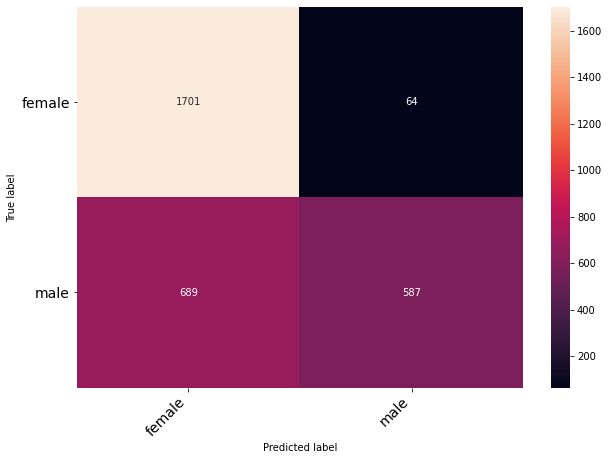

In [33]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })
modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })
classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [34]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.71      0.96      0.82      1765
        male       0.90      0.46      0.61      1276

    accuracy                           0.75      3041
   macro avg       0.81      0.71      0.71      3041
weighted avg       0.79      0.75      0.73      3041



0.48635317329825717


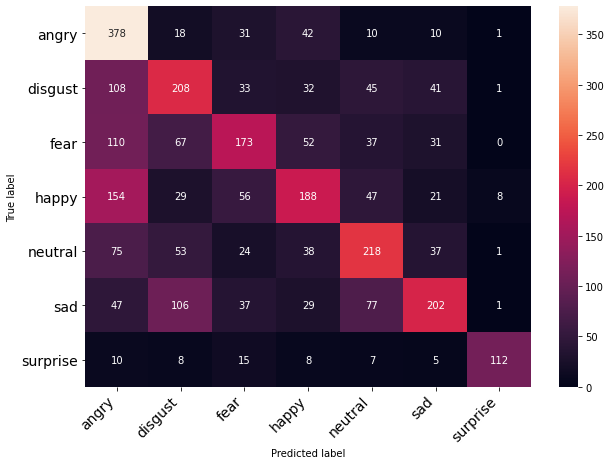

In [35]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })
modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 
# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [36]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.43      0.77      0.55       490
     disgust       0.43      0.44      0.43       468
        fear       0.47      0.37      0.41       470
       happy       0.48      0.37      0.42       503
     neutral       0.49      0.49      0.49       446
         sad       0.58      0.40      0.48       499
    surprise       0.90      0.68      0.78       165

    accuracy                           0.49      3041
   macro avg       0.54      0.50      0.51      3041
weighted avg       0.50      0.49      0.48      3041



Testing the Model on External Audio

In [37]:
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras 
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [38]:
data, sampling_rate = librosa.load("C:/Users/mailt/Desktop/check/test1.wav")
ipd.Audio("C:/Users/mailt/Desktop/check/test1.wav")

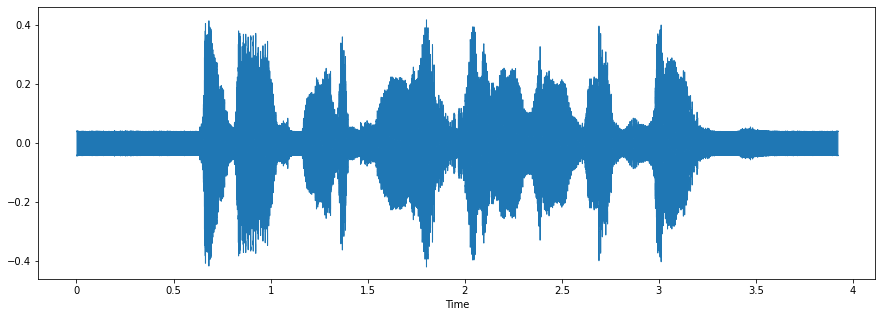

In [39]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [40]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# loading weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [41]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load("C:/Users/mailt/Desktop/check/test1.wav"
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0          1          2          3          4          5          6    \
0 -9.123227 -13.460225 -25.836161 -27.235168 -25.994761 -24.280783 -25.128237   

         7          8          9    ...        206        207        208  \
0 -26.114035 -26.302347 -27.003796  ... -10.287128 -10.711378 -11.854089   

         209        210        211       212       213       214       215  
0 -12.928701 -13.915178 -12.928199 -10.69377 -8.490061 -3.453648  0.507728  

[1 rows x 216 columns]

In [42]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 132ms/step


array([[5.9556824e-16, 2.4416380e-10, 7.4304000e-15, 3.0949365e-11,
        3.7908519e-15, 1.9126116e-17, 1.8650834e-10, 7.3304763e-13,
        8.9145541e-01, 3.6023871e-06, 5.8255661e-10, 2.3561297e-11,
        1.0851505e-01, 2.5878138e-05]], dtype=float32)

In [43]:
filename = "C:/Users/mailt/Desktop/check/labels"
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['male_disgust']


In [44]:
data, sampling_rate = librosa.load("C:/Users/mailt/Desktop/check/test2.wav")
ipd.Audio("C:/Users/mailt/Desktop/check/test2.wav")

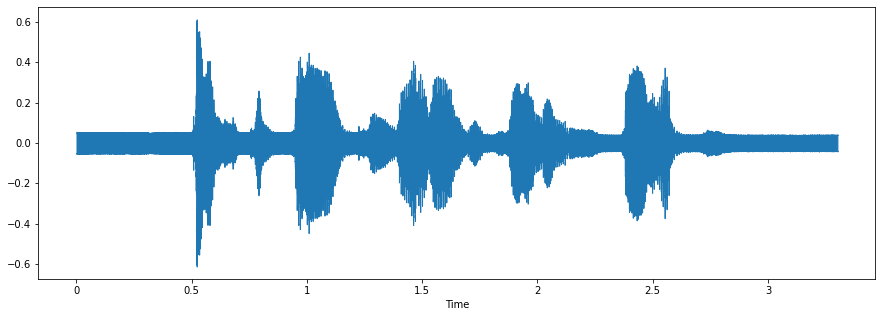

In [45]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [46]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# loading weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [47]:
# transforming the dataset so we can apply the predictions
X, sample_rate = librosa.load("C:/Users/mailt/Desktop/check/test2.wav"
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

0         1         2         3         4         5         6    \
0 -7.667115 -5.987023 -7.518021 -7.506943 -7.403336 -7.362275 -8.112684   

        7         8         9    ...        206        207        208  \
0 -6.900737 -7.539662 -7.677541  ... -25.768373 -24.080477 -23.160267   

         209       210        211        212        213        214       215  
0 -23.539013 -23.78928 -25.096966 -24.103722 -22.289074 -17.206614 -9.026888  

[1 rows x 216 columns]

In [48]:
# Applying the predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

1/1 [==============================] - 0s 132ms/step


array([[9.9658587e-38, 1.6557558e-25, 5.4931713e-27, 5.3029855e-26,
        2.0239571e-27, 2.7179148e-21, 1.9693563e-20, 3.8585215e-19,
        1.0182433e-03, 3.2969625e-09, 7.1168861e-12, 5.4176287e-03,
        9.9356407e-01, 2.2997352e-11]], dtype=float32)

In [49]:
filename = "C:/Users/mailt/Desktop/check/labels"
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Geting the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 

['male_sad']


# 4.DATA AUGMENTATION

In [50]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
from tqdm import tqdm
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [51]:

# Augmentation methods

def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=-0.5 ,high=7)  # default low = 1.5, high = 3
    return (data * dyn_change)
def speedNpitch(data):
    """
    speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

####################################
# the confusion matrix heat map plot
####################################
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
 Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Explore augmentation method

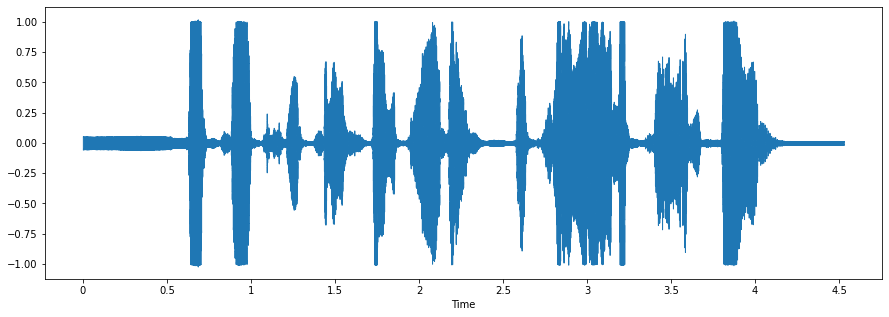

In [52]:
# Use one audio file in previous parts again
fname = 'C:/Users/mailt/Desktop/review/ALL/JK_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)

Static noise

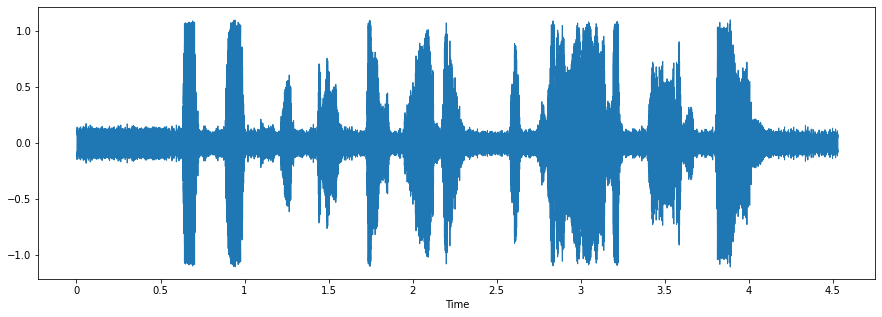

In [53]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

SHIFT

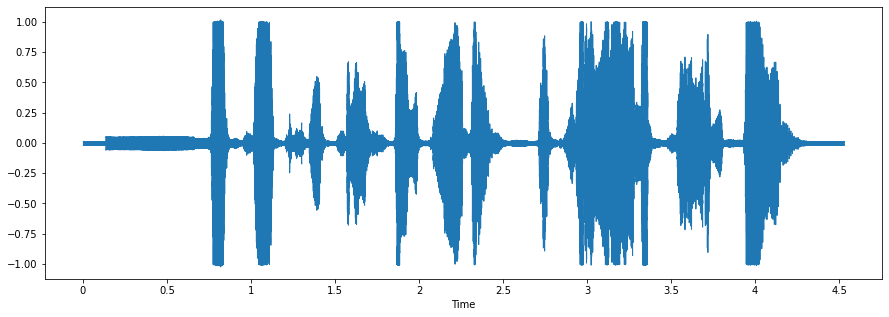

In [54]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)


STRETCH

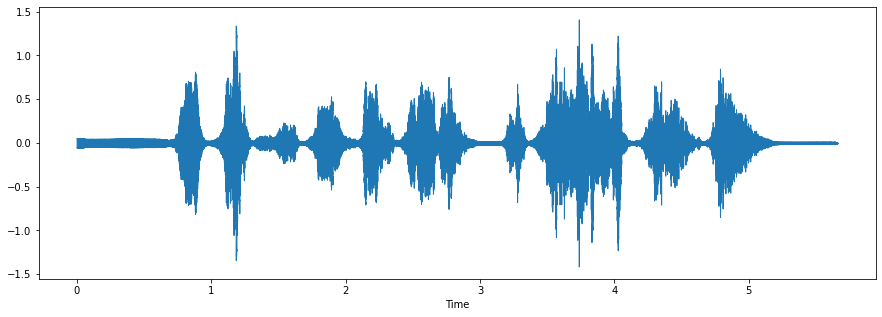

In [55]:
x = stretch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

PITCH

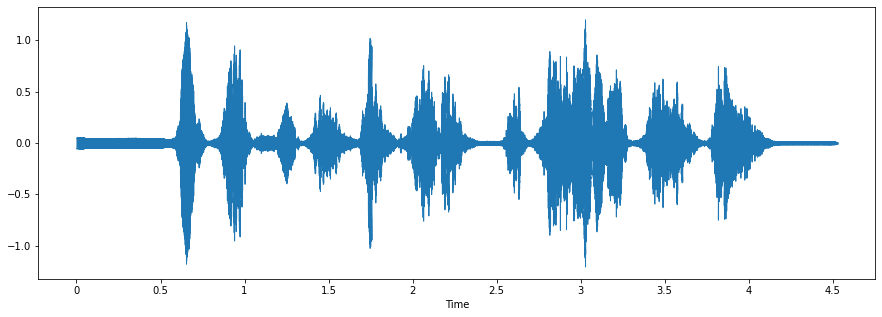

In [56]:
x = pitch(data, sampling_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

DYNAMIC CHANGE

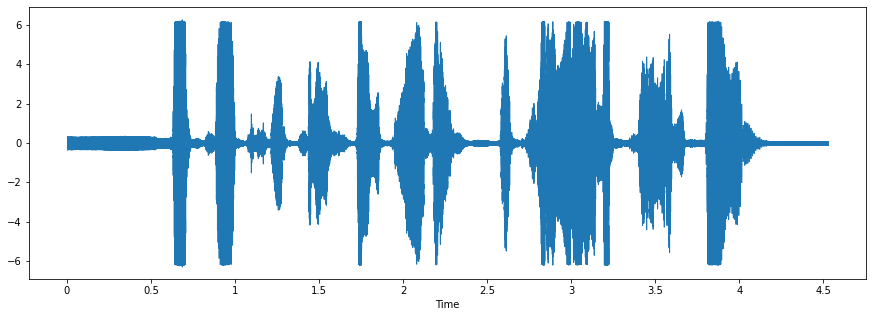

In [57]:
x = dyn_change(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

SPEED AND PITCH

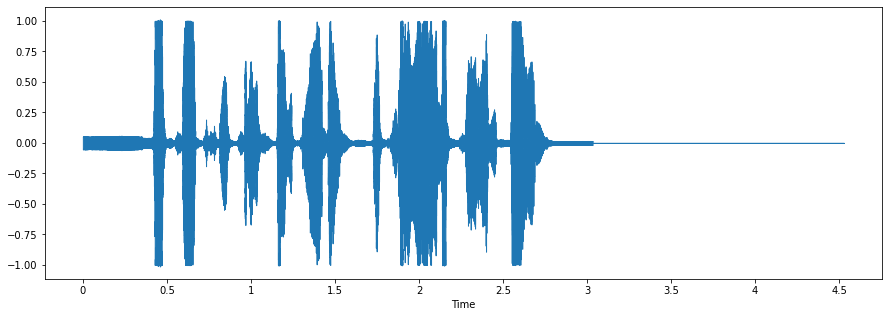

In [58]:
x = speedNpitch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

Data preparation and processing

In [59]:
#LOAD the meta-data that we got from our first part of the Kernel

ref = pd.read_csv("C:/Users/mailt/Desktop/review/Data_path.csv")

ref.head()

labels source                                          path
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav

In [60]:
 
df = pd.DataFrame(columns=['feature'])
df_noise = pd.DataFrame(columns=['feature'])
df_speedpitch = pd.DataFrame(columns=['feature'])
cnt = 0

# loop feature extraction over the entire dataset
for i in tqdm(ref.path):
    
    # first load the audio 
    X, sample_rate = librosa.load(i
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
  # take mfcc and mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=np.array(sample_rate), 
                                        n_mfcc=13),
                    axis=0)
    
    df.loc[cnt] = [mfccs]   

   
    
    # noise 
    aug = noise(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_noise.loc[cnt] = [aug]
    # speed pitch
    aug = speedNpitch(X)
    aug = np.mean(librosa.feature.mfcc(y=aug, 
                                    sr=np.array(sample_rate), 
                                    n_mfcc=13),    
                  axis=0)
    df_speedpitch.loc[cnt] = [aug]   

    cnt += 1

df.head()

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [11:39<00:00, 17.39it/s]


feature
0  [-4.6414213, -3.860898, -6.21919, -5.9265423, ...
1  [-8.690716, -12.522837, -22.928043, -23.243807...
2  [-8.814859, -12.819055, -24.178183, -23.84745,...
3  [-2.2684252, -4.317077, -12.285238, -13.083024...
4  [-13.485307, -16.26042, -25.884357, -27.827044...

In [61]:
# saving it
df.to_pickle('my4EmotionDatabases-with-augmentation')

In [62]:
# loading it
df = pd.read_pickle('my4EmotionDatabases-with-augmentation')
df.head()

feature
0  [-4.6414213, -3.860898, -6.21919, -5.9265423, ...
1  [-8.690716, -12.522837, -22.928043, -23.243807...
2  [-8.814859, -12.819055, -24.178183, -23.84745,...
3  [-2.2684252, -4.317077, -12.285238, -13.083024...
4  [-13.485307, -16.26042, -25.884357, -27.827044...

In [63]:
# combine 
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df_noise = pd.concat([ref,pd.DataFrame(df_noise['feature'].values.tolist())],axis=1)
df_speedpitch = pd.concat([ref,pd.DataFrame(df_speedpitch['feature'].values.tolist())],axis=1)
print(df.shape,df_noise.shape,df_speedpitch.shape)

(12162, 219) (12162, 219) (12162, 219)


In [64]:
df = pd.concat([df,df_noise,df_speedpitch],axis=0,sort=False)
df=df.fillna(0)
del df_noise, df_speedpitch

df.head()

labels source                                          path          0  \
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav  -4.641421   
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav  -8.690716   
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav  -8.814859   
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav  -2.268425   
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav -13.485307   

           1          2          3          4          5          6  ...  \
0  -3.860898  -6.219190  -5.926542  -5.850419  -4.808960  -2.513003  ...   
1 -12.522837 -22.928043 -23.243807 -22.926605 -23.432241 -14.830004  ...   
2 -12.819055 -24.178183 -23.847450 -15.182783 -10.732485  -8.681472  ...   
3  -4.317077 -12.285238 -13.083024 -12.041327 -11.819768  -9.414148  ...   
4 -16.260420 -25.884357 -27.827044 -27.593534 -26.666508 -18.659023  ...   

         206        207        208        209        210        211  \
0  -4.088852  -5.023864  -5.254714  -5.234095  -5.310307  -5.621666   
1 -22.627258 -22.633406 -22.511597 -24.300154 -24.496809 -22.895985   
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4 -25.291666 -25.854906 -26.821354 -25.436455 -24.179941 -23.281618   

         212        213        214        215  
0  -6.072197  -6.611348  -3.999875   1.390506  
1 -23.511503 -24.342152 -16.465857  -8.936035  
2   0.000000   0.000000   0.000000   0.000000  
3   0.000000   0.000000   0.000000   0.000000  
4 -24.167494 -25.228062 -20.599659 -15.929615  

[5 rows x 219 columns]

In [65]:
# Spliting between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

#data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
3857  -15.765240 -17.133303 -19.315730 -20.023315 -19.156987 -19.613980   
7298   -9.607160 -11.524982 -11.849034 -12.167595 -11.268546 -10.129864   
5874  -19.315508 -17.835642 -18.339222 -17.055897 -16.256907 -16.201811   
858   -35.412408 -30.917714 -30.331845 -29.475041 -30.194425 -31.972872   
891   -38.996762 -34.496113 -35.326544 -33.536126 -34.441822 -35.247992   
1748  -46.352503 -43.142661 -43.068824 -43.212147 -40.620948 -39.175124   
9995   -6.054121  -7.844804  -7.685878  -7.710426  -9.083555  -8.221648   
5771  -18.822176 -15.109279 -17.066648 -17.905895 -17.704601 -16.798384   
1029  -52.815529 -49.993767 -48.527386 -48.436089 -47.657467 -47.585308   
10882 -18.436522 -17.342204 -15.329515 -14.267906 -13.301888 -13.948874   

             6          7          8          9    ...        206        207  \
3857  -20.849727 -23.153625 -24.597082 -21.901810  ...   0.000000   0.000000   
7298   -9.362245  -9.542078 -10.922944 -12.648921  ...   0.000000   0.000000   
5874  -17.400110 -16.590267 -14.986216 -15.856536  ...   0.000000   0.000000   
858   -31.357981 -33.423924 -36.012525 -34.301714  ... -24.945979 -24.066284   
891   -37.985539 -39.729174 -38.260169 -39.654736  ... -21.873015 -21.366657   
1748  -41.808464 -45.028096 -43.155193 -42.920326  ... -40.155757 -41.420543   
9995   -8.415778  -9.534316  -7.854500  -7.269660  ...   0.000000   0.000000   
5771  -17.002083 -14.373888 -13.946708 -11.543315  ...   0.000000   0.000000   
1029  -52.484028 -52.127987 -49.889915 -48.915176  ... -56.294712 -56.294712   
10882 -12.497120 -13.243563 -16.229280 -20.404682  ...   0.000000   0.000000   

             208        209        210        211        212        213  \
3857    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
7298    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5874    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
858   -23.001094 -22.267661 -21.971702 -21.783243 -21.772964 -21.257927   
891   -22.976941 -22.542125 -22.457029 -21.766727 -21.421852 -23.383286   
1748  -42.368842 -42.115179 -43.501419 -43.634565 -42.869293 -43.795465   
9995    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
5771    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1029  -56.294712 -56.294712 -56.294712 -56.294712 -56.294712 -56.294712   
10882   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             214        215  
3857    0.000000   0.000000  
7298    0.000000   0.000000  
5874    0.000000   0.000000  
858   -19.663852 -15.250054  
891   -23.086554 -22.008817  
1748  -44.905711 -45.498969  
9995    0.000000   0.000000  
5771    0.000000   0.000000  
1029  -56.294712 -56.294712  
10882   0.000000   0.000000  

[10 rows x 216 columns]

In [66]:
# Doing data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Checking the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
3857   0.454908  0.309604  0.292145  0.228874  0.292193  0.250742  0.146131   
7298   0.945874  0.768458  0.895655  0.862450  0.927261  1.013258  1.067831   
5874   0.171855  0.252141  0.371073  0.468201  0.525667  0.525078  0.422912   
858   -1.111506 -0.818190 -0.598254 -0.533422 -0.596389 -0.742904 -0.696999   
891   -1.397276 -1.110963 -1.001960 -0.860955 -0.938331 -1.006222 -1.228762   
1748  -1.983728 -1.818394 -1.627745 -1.641341 -1.435788 -1.321960 -1.535495   
9995   1.229148  1.069557  1.232150  1.221928  1.103166  1.166678  1.143771   
5771   0.211187  0.475203  0.473931  0.399647  0.409119  0.477114  0.454848   
1029  -2.499007 -2.378928 -2.068944 -2.062660 -2.002272 -1.998133 -2.392050   
10882  0.241934  0.292512  0.614338  0.693057  0.763565  0.706213  0.816304   

            7         8         9    ...       206       207       208  \
3857  -0.042160 -0.162410  0.048740  ...  0.534192  0.521865  0.521887   
7298   1.048339  0.932150  0.789434  ...  0.534192  0.521865  0.521887   
5874   0.483668  0.606902  0.532665  ...  0.534192  0.521865  0.521887   
858   -0.864973 -1.076170 -0.943872  ... -0.772331 -0.748184 -0.691196   
891   -1.370123 -1.256085 -1.372381  ... -0.611387 -0.605717 -0.689922   
1748  -1.794650 -1.647912 -1.633792  ... -1.568929 -1.664020 -1.712656   
9995   1.048961  1.177767  1.220044  ...  0.534192  0.521865  0.521887   
5771   0.661235  0.690110  0.877938  ...  0.534192  0.521865  0.521887   
1029  -2.363463 -2.187000 -2.113679  ... -2.414192 -2.448974 -2.447110   
10882  0.751792  0.507399  0.168586  ...  0.534192  0.521865  0.521887   

            209       210       211       212       213       214       215  
3857   0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  
7298   0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  
5874   0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  
858   -0.650215 -0.659344 -0.647921 -0.644223 -0.636870 -0.557296 -0.317577  
891   -0.664669 -0.685145 -0.647044 -0.625616 -0.750367 -0.740461 -0.677154  
1748  -1.695433 -1.803917 -1.808356 -1.762182 -1.840396 -1.908107 -1.926868  
9995   0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  
5771   0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  
1029  -2.442161 -2.484040 -2.480686 -2.473635 -2.507867 -2.517586 -2.501218  
10882  0.522453  0.508726  0.508899  0.509593  0.498322  0.495010  0.493750  

[10 rows x 216 columns]

In [67]:
#preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(27364, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [68]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(27364, 216, 1)

Modelling

In [69]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 216, 256)          2304      
                                                                 
 activation_9 (Activation)   (None, 216, 256)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 216, 256)          524544    
                                                                 
 batch_normalization_2 (Batc  (None, 216, 256)         1024      
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 216, 256)          0         
                                                                 
 dropout_2 (Dropout)         (None, 216, 256)          0         
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test),verbose=2)

Epoch 1/50
1711/1711 - 248s - loss: 1.7916 - accuracy: 0.3743 - val_loss: 1.8893 - val_accuracy: 0.3697 - 248s/epoch - 145ms/step
Epoch 2/50
1711/1711 - 236s - loss: 1.7636 - accuracy: 0.3835 - val_loss: 1.8912 - val_accuracy: 0.3604 - 236s/epoch - 138ms/step
Epoch 3/50
1711/1711 - 231s - loss: 1.7385 - accuracy: 0.3902 - val_loss: 1.8285 - val_accuracy: 0.3853 - 231s/epoch - 135ms/step
Epoch 4/50
1711/1711 - 335s - loss: 1.7222 - accuracy: 0.3961 - val_loss: 1.8438 - val_accuracy: 0.3744 - 335s/epoch - 196ms/step
Epoch 5/50
1711/1711 - 390s - loss: 1.6988 - accuracy: 0.4081 - val_loss: 1.8538 - val_accuracy: 0.3686 - 390s/epoch - 228ms/step
Epoch 6/50
1711/1711 - 357s - loss: 1.6814 - accuracy: 0.4126 - val_loss: 1.7901 - val_accuracy: 0.3891 - 357s/epoch - 208ms/step
Epoch 7/50
1711/1711 - 263s - loss: 1.6654 - accuracy: 0.4178 - val_loss: 1.8078 - val_accuracy: 0.3885 - 263s/epoch - 154ms/step
Epoch 8/50
1711/1711 - 251s - loss: 1.6508 - accuracy: 0.4200 - val_loss: 1.7757 - val_acc

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model serialisation

In [ ]:
# Saving model and weights
model_name = 'Emotion_Model_aug.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Saving the model to device
model_json = model.to_json()
with open("model_json_aug.json", "w") as json_file:
    json_file.write(model_json)

 Model validation

In [ ]:
# loading json and model architecture 
json_file = open('model_json_aug.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# loading weights into new model
loaded_model.load_weights("saved_models/Emotion_Model_aug.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

In [ ]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

In [ ]:
# Writing out the predictions to device
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

In [ ]:
# Geting the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

In [ ]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })
modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })
modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 
# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

# 2D CNN

In [4]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [5]:
'''
1. Data Augmentation method   
'''
def speedNpitch(data):
    """
    Speed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.2  / length_change # try changing 1.0 to 2.0 ... =D
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

'''
2. Extracting the MFCC feature as an image (Matrix format).  
'''
def prepare_data(df, n, aug, mfcc):
    X = np.empty(shape=(df.shape[0], n, 216, 1))
    input_length = sampling_rate * audio_duration
    
    cnt = 0
    for fname in tqdm(df.path):
        file_path = fname
        data, _ = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")

        # Augmentation? 
        if aug == 1:
            data = speedNpitch(data)
        
        # which feature?
        if mfcc == 1:
            # MFCC extraction 
            MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            
        else:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)   
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            
        cnt += 1
    
    return X


'''
3. Confusion matrix plot 
'''        
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    '''Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    '''
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
    
'''
# 4. Create the 2D CNN model 
'''
def get_2d_conv_model(n):
    ''' Create a standard deep 2D convolutional neural network'''
    nclass = 14
    inp = Input(shape=(n,216,1))  #2D matrix of 30 MFCC bands by 216 audio length.
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation=softmax)(x)
    model = models.Model(inputs=inp, outputs=out)
    
    opt =tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

'''
# 5. Other functions 
'''
class get_results:
    '''
    We're going to create a class (blueprint template) for generating the results based on the various model approaches. 
    So instead of repeating the functions each time, we assign the results into on object with its associated variables 
    depending on each combination:
        1) MFCC with no augmentation  
        2) MFCC with augmentation 
        3) Logmelspec with no augmentation 
        4) Logmelspec with augmentation
    '''
    
    def __init__(self, model_history, model ,X_test, y_test, labels):
        self.model_history = model_history
        self.model = model
        self.X_test = X_test
        self.y_test = y_test             
        self.labels = labels

    def create_plot(self, model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def create_results(self, model):
        '''predict on test set and get accuracy results'''
        opt =tf.keras.optimizers.Adam(0.001)
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        score = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    def confusion_results(self, X_test, y_test, labels, model):
        '''plot confusion matrix results'''
        preds = model.predict(X_test, 
                                 batch_size=16, 
                                 verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))

        classes = labels
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print_confusion_matrix(c, class_names = classes)
    
    def accuracy_results_gender(self, X_test, y_test, labels, model):
        '''Print out the accuracy score and confusion matrix heat map of the Gender classification results'''
    
        preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=2)
        preds=preds.argmax(axis=1)
        preds = preds.astype(int).flatten()
        preds = (lb.inverse_transform((preds)))

        actual = y_test.argmax(axis=1)
        actual = actual.astype(int).flatten()
        actual = (lb.inverse_transform((actual)))
        
        # print(accuracy_score(actual, preds))
        
        actual = pd.DataFrame(actual).replace({'female_angry':'female'
                   , 'female_disgust':'female'
                   , 'female_fear':'female'
                   , 'female_happy':'female'
                   , 'female_sad':'female'
                   , 'female_surprise':'female'
                   , 'female_neutral':'female'
                   , 'male_angry':'male'
                   , 'male_fear':'male'
                   , 'male_happy':'male'
                   , 'male_sad':'male'
                   , 'male_surprise':'male'
                   , 'male_neutral':'male'
                   , 'male_disgust':'male'
                  })
        preds = pd.DataFrame(preds).replace({'female_angry':'female'
               , 'female_disgust':'female'
               , 'female_fear':'female'
               , 'female_happy':'female'
               , 'female_sad':'female'
               , 'female_surprise':'female'
               , 'female_neutral':'female'
               , 'male_angry':'male'
               , 'male_fear':'male'
               , 'male_happy':'male'
               , 'male_sad':'male'
               , 'male_surprise':'male'
               , 'male_neutral':'male'
               , 'male_disgust':'male'
              })

        classes = actual.loc[:,0].unique() 
        classes.sort()    

        c = confusion_matrix(actual, preds)
        print(accuracy_score(actual, preds))
        print_confusion_matrix(c, class_names = classes)

MFCC WITHOUT AUGMENTATION

In [6]:

ref = pd.read_csv("C:/Users/mailt/Desktop/review/Data_path.csv")
ref.head()

labels source                                          path
0  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a01.wav
1  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a02.wav
2  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a03.wav
3  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a04.wav
4  male_angry  SAVEE  C:/Users/mailt/Desktop/review/ALL/DC_a05.wav

In [7]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc = prepare_data(ref, n = n_mfcc, aug = 0, mfcc = 1)

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [05:46<00:00, 35.11it/s]


In [9]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# one hot encode the target 
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
571/571 - 121s - loss: 2.2547 - acc: 0.2350 - val_loss: 1.9587 - val_acc: 0.3420 - 121s/epoch - 212ms/step
Epoch 2/20
571/571 - 123s - loss: 1.6705 - acc: 0.4150 - val_loss: 1.6503 - val_acc: 0.4351 - 123s/epoch - 215ms/step
Epoch 3/20
571/571 - 124s - loss: 1.4624 - acc: 0.4838 - val_loss: 1.3208 - val_acc: 0.5284 - 124s/epoch - 218ms/step
Epoch 4/20
571/571 - 125s - loss: 1.3415 - acc: 0.5184 - val_loss: 1.4066 - val_acc: 0.4929 - 125s/epoch - 218ms/step
Epoch 5/20
571/571 - 125s - loss: 1.2860 - acc: 0.5393 - val_loss: 1.1915 - val_acc: 0.5781 - 125s/epoch - 218ms/step
Epoch 6/20
571/571 - 125s - loss: 1.2243 - acc: 0.5579 - val_loss: 1.0870 - val_acc: 0.6034 - 125s/epoch - 219ms/step
Epoch 7/20
571/571 - 125s - loss: 1.1805 - acc: 0.5752 - val_loss: 1.1204 - val_acc: 0.5880 - 125s/epoch - 219ms/step
Epoch 8/20
571/571 - 125s - loss: 1.1407 - acc: 0.5936 - val_loss: 1.1107 - val_acc: 0.5893 - 125s/epoch - 219ms/step
Epoch 9/20
571/571 - 125s - loss: 1.1163 - acc: 0.5995 -

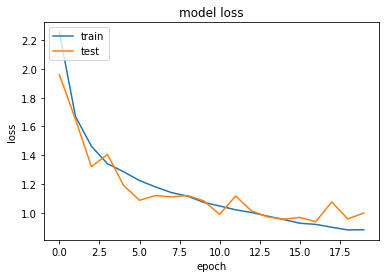

accuracy: 63.17%
191/191 - 5s - 5s/epoch - 28ms/step


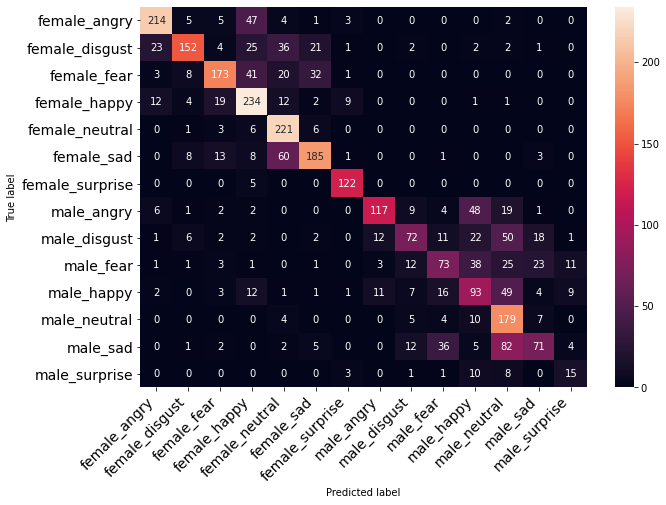

In [10]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

MFCC WITH AUGMENTATION

In [11]:
sampling_rate=44100
audio_duration=2.5
n_mfcc = 30
mfcc_aug = prepare_data(ref, n = n_mfcc, aug = 1, mfcc = 1)

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [05:12<00:00, 38.95it/s]


In [13]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc_aug
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# one hot encode the target 
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)

# X_train = (X_train - mean)/std
# X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_mfcc)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
571/571 - 121s - loss: 2.2698 - acc: 0.2419 - val_loss: 1.8539 - val_acc: 0.3568 - 121s/epoch - 211ms/step
Epoch 2/20
571/571 - 123s - loss: 1.8018 - acc: 0.3717 - val_loss: 1.5600 - val_acc: 0.4531 - 123s/epoch - 215ms/step
Epoch 3/20
571/571 - 124s - loss: 1.6182 - acc: 0.4227 - val_loss: 1.6033 - val_acc: 0.4137 - 124s/epoch - 218ms/step
Epoch 4/20
571/571 - 125s - loss: 1.5140 - acc: 0.4582 - val_loss: 1.6123 - val_acc: 0.4288 - 125s/epoch - 219ms/step
Epoch 5/20
571/571 - 126s - loss: 1.4311 - acc: 0.4941 - val_loss: 1.4470 - val_acc: 0.4650 - 126s/epoch - 220ms/step
Epoch 6/20
571/571 - 125s - loss: 1.3691 - acc: 0.5196 - val_loss: 1.2782 - val_acc: 0.5383 - 125s/epoch - 220ms/step
Epoch 7/20
571/571 - 125s - loss: 1.3094 - acc: 0.5298 - val_loss: 1.1510 - val_acc: 0.5814 - 125s/epoch - 220ms/step
Epoch 8/20
571/571 - 125s - loss: 1.2737 - acc: 0.5401 - val_loss: 1.1556 - val_acc: 0.5768 - 125s/epoch - 219ms/step
Epoch 9/20
571/571 - 124s - loss: 1.2357 - acc: 0.5586 -

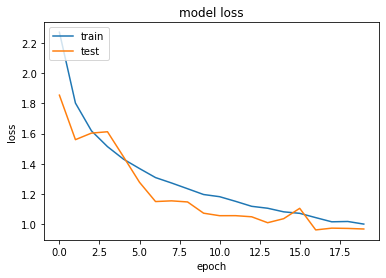

accuracy: 63.30%
191/191 - 6s - 6s/epoch - 29ms/step


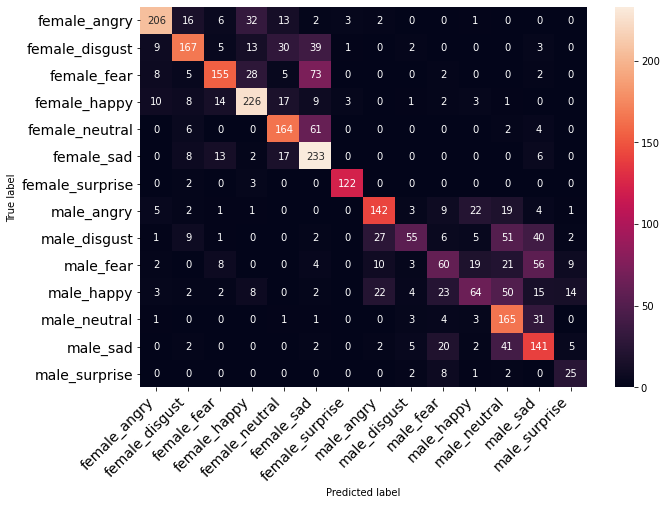

In [14]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

Log-melspectogram without augmentation

In [15]:
sampling_rate=44100
audio_duration=2.5
n_melspec = 60
specgram = prepare_data(ref, n = n_melspec, aug = 0, mfcc = 0)

100%|████████████████████████████████████████████████████████████████████████████| 12162/12162 [04:37<00:00, 43.81it/s]


In [17]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(specgram
                                                    , ref.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )



# one hot encode the target 
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Build CNN model 
model = get_2d_conv_model(n=n_melspec)
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Epoch 1/20
571/571 - 250s - loss: 2.3301 - acc: 0.2046 - val_loss: 1.9772 - val_acc: 0.3430 - 250s/epoch - 438ms/step
Epoch 2/20
571/571 - 251s - loss: 1.9211 - acc: 0.3243 - val_loss: 1.7276 - val_acc: 0.3897 - 251s/epoch - 440ms/step
Epoch 3/20
571/571 - 253s - loss: 1.6845 - acc: 0.4049 - val_loss: 1.6366 - val_acc: 0.4104 - 253s/epoch - 444ms/step
Epoch 4/20
571/571 - 253s - loss: 1.5551 - acc: 0.4448 - val_loss: 1.3767 - val_acc: 0.5130 - 253s/epoch - 442ms/step
Epoch 5/20
571/571 - 254s - loss: 1.4502 - acc: 0.4858 - val_loss: 1.3421 - val_acc: 0.5242 - 254s/epoch - 444ms/step
Epoch 6/20
571/571 - 253s - loss: 1.3946 - acc: 0.5048 - val_loss: 1.3437 - val_acc: 0.5192 - 253s/epoch - 443ms/step
Epoch 7/20
571/571 - 255s - loss: 1.3177 - acc: 0.5292 - val_loss: 1.1520 - val_acc: 0.5768 - 255s/epoch - 446ms/step
Epoch 8/20
571/571 - 254s - loss: 1.2737 - acc: 0.5395 - val_loss: 1.1451 - val_acc: 0.5853 - 254s/epoch - 444ms/step
Epoch 9/20
571/571 - 255s - loss: 1.2246 - acc: 0.5585 -

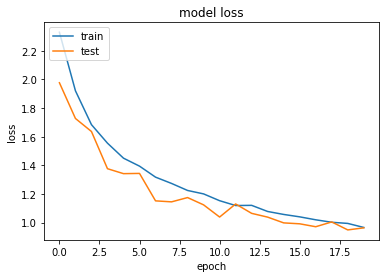

accuracy: 64.68%
191/191 - 12s - 12s/epoch - 62ms/step


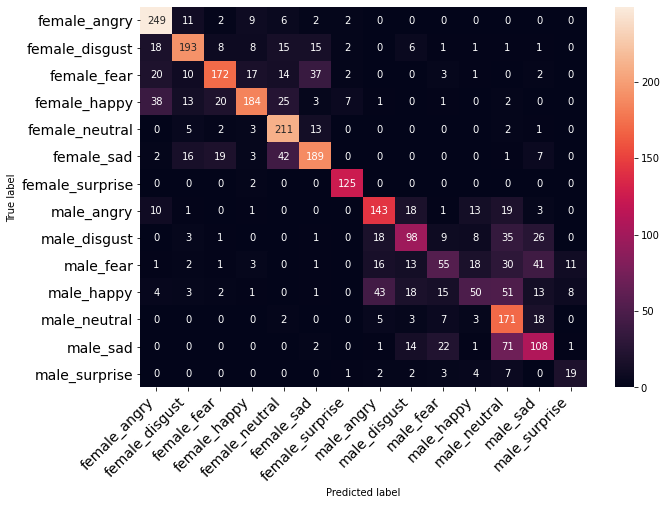

In [18]:
results = get_results(model_history,model,X_test,y_test, ref.labels.unique())
results.create_plot(model_history)
results.create_results(model)
results.confusion_results(X_test, y_test, ref.labels.unique(), model)

TESTING WITH LIVE VOICES

In [19]:
data, sampling_rate = librosa.load("C:/Users/mailt/Desktop/check/test1.wav")
ipd.Audio("C:/Users/mailt/Desktop/check/test1.wav")

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [ ]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# loading weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# Lets transform the dataset so we can apply the predictions
X, sample_rate = librosa.load("C:/Users/mailt/Desktop/check/test1.wav"
                              ,res_type='kaiser_fast'
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5
                             )

sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

In [ ]:
# Apply predictions
newdf= np.expand_dims(newdf, axis=2)
newpred = loaded_model.predict(newdf, 
                         batch_size=16, 
                         verbose=1)

newpred

In [ ]:
filename = "C:/Users/mailt/Desktop/check/labels"
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final predicted label
final = newpred.argmax(axis=1)
final = final.astype(int).flatten()
final = (lb.inverse_transform((final)))
print(final) #emo(final) #gender(final) 